<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.covariance import EmpiricalCovariance
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

Get the Vertebral Column Data Set

In [9]:
# Read into the file
df=pd.read_csv('../data/vertebral_column_data/column_2C.dat',header=None,delimiter=' ')

#set column names
features = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis', 'Class']
df.columns = features

#rename the label
df['Class'] = df['Class'].map({'NO': 0, 'AB': 1})


print(df)


     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0               63.03        22.55                  39.61         40.48   
1               39.06        10.06                  25.02         29.00   
2               68.83        22.22                  50.09         46.61   
3               69.30        24.65                  44.31         44.64   
4               49.71         9.65                  28.32         40.06   
..                ...          ...                    ...           ...   
305             47.90        13.62                  36.00         34.29   
306             53.94        20.72                  29.22         33.22   
307             61.45        22.69                  46.17         38.75   
308             45.25         8.69                  41.58         36.56   
309             33.84         5.07                  36.64         28.77   

     pelvic_radius  grade_of_spondylolisthesis  Class  
0            98.67                       -0

### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

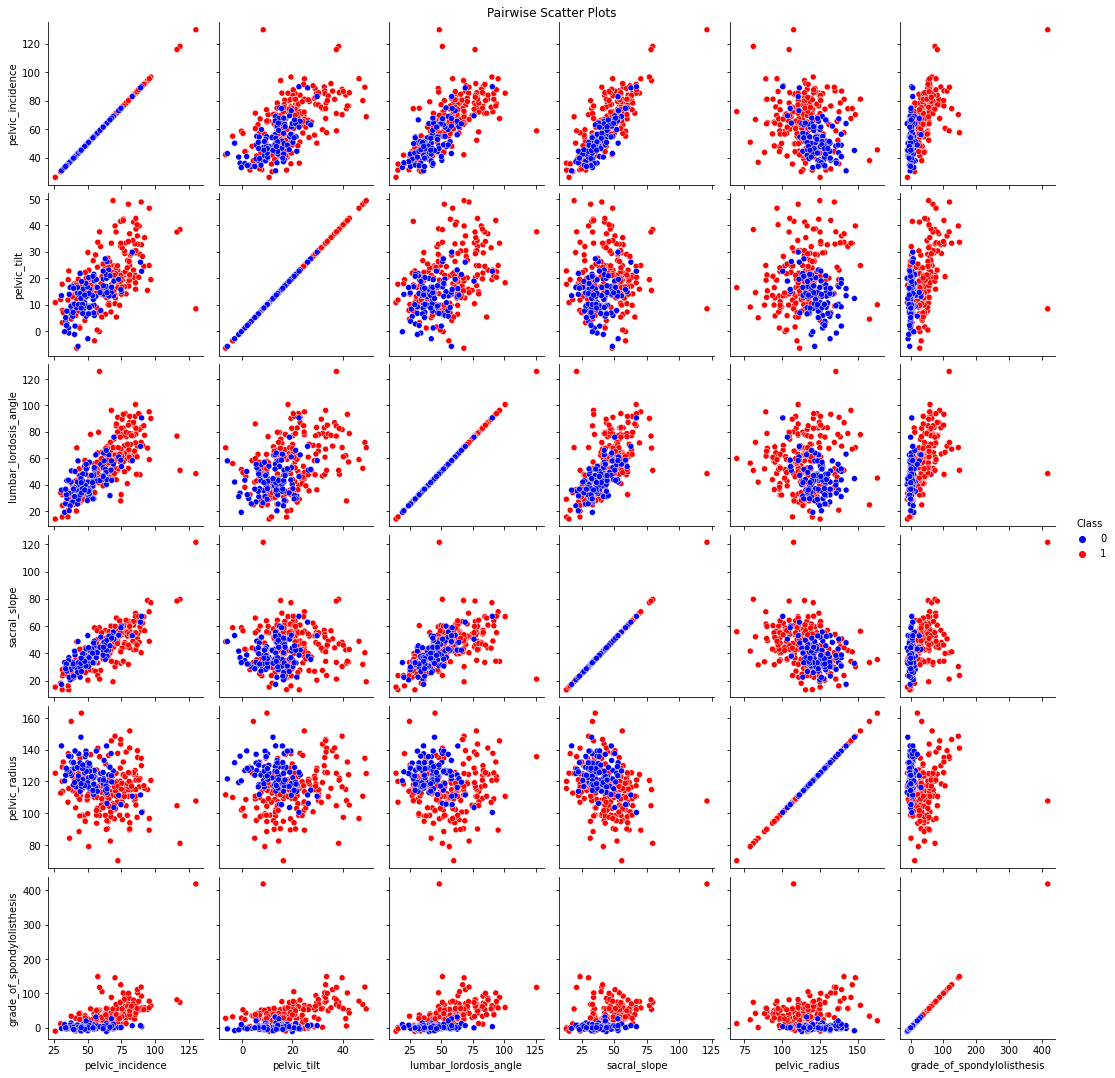

In [10]:
features = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis']

# Create the pairwise scatter plot
sns.pairplot(df, hue='Class', vars=features, diag_kind=None, palette={0: 'blue', 1: 'red'})
plt.suptitle('Pairwise Scatter Plots', y=1)
plt.show()

#List of feature names
# features = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis']

# # Create scatter plots
# for i, feature1 in enumerate(features):
#     for j, feature2 in enumerate(features):
#         if i < j:  # To avoid self-comparisons
#             plt.figure(figsize=(10, 6))
            
#             # Class 0 points in blue
#             plt.scatter(df[df['Class'] == 0][feature1], df[df['Class'] == 0][feature2], label='Class 0', c='blue')
            
#             # Class 1 points in red
#             plt.scatter(df[df['Class'] == 1][feature1], df[df['Class'] == 1][feature2], label='Class 1', c='red')
            
#             plt.xlabel(feature1)
#             plt.ylabel(feature2)
#             plt.legend()
#             plt.title(f'Scatter plot of {feature1} vs {feature2}')
#             plt.show()

#### ii. Boxplots

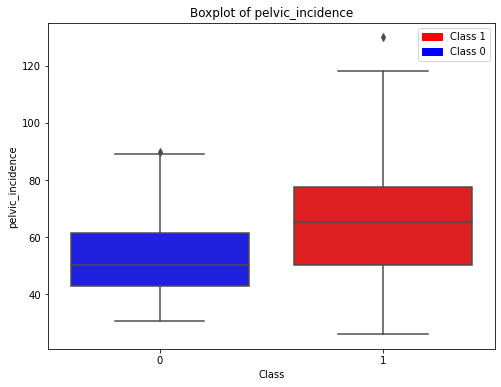

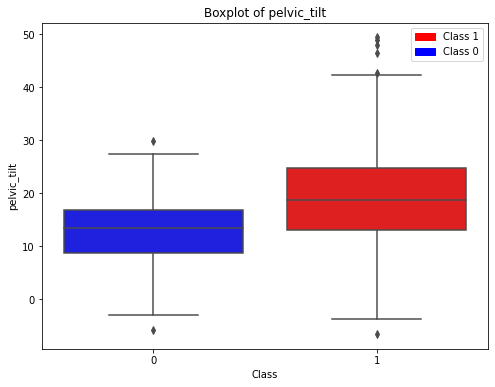

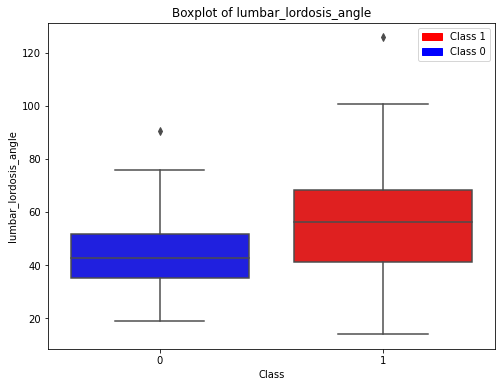

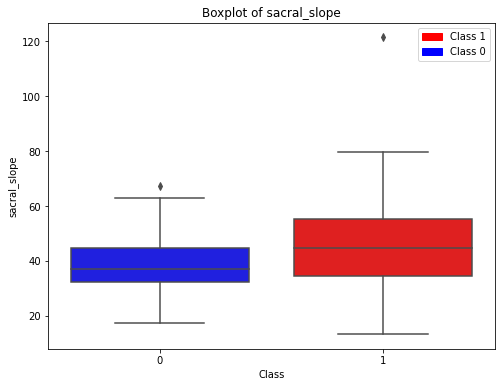

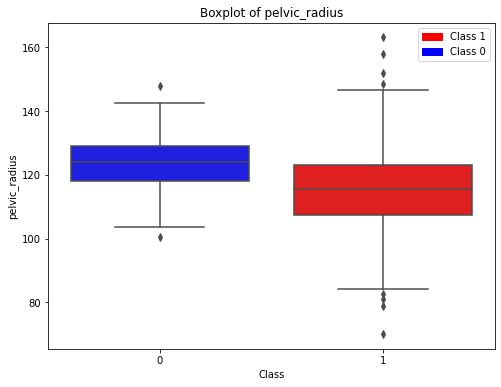

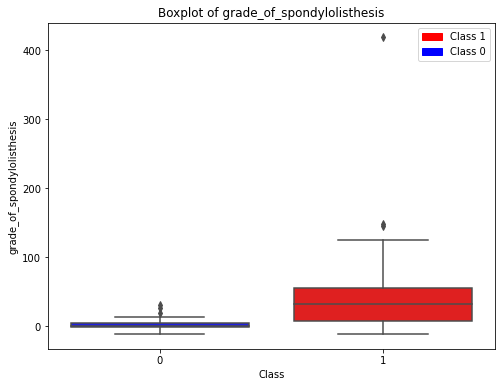

In [11]:
features = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis']

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Class', y=feature, data=df, palette={0: 'blue', 1: 'red'})
    
    # Add legend manually
    red_patch = mpatches.Patch(color='red', label='Class 1')
    blue_patch = mpatches.Patch(color='blue', label='Class 0')
    plt.legend(handles=[red_patch, blue_patch])
    
    plt.title(f'Boxplot of {feature}')
    plt.show()

#### iii. Split Data Set

In [12]:
# Select the first 70 rows where Class is 0
train_class_0 = df[df['Class'] == 0].head(70)

# Select the first 140 rows where Class is 1
train_class_1 = df[df['Class'] == 1].head(140)

# Concatenate the two to create the training set
train_data = pd.concat([train_class_0, train_class_1], axis=0)

# Select remaining data as test set
test_class_0 = df[df['Class'] == 0].tail(df[df['Class'] == 0].shape[0] - 70)
test_class_1 = df[df['Class'] == 1].tail(df[df['Class'] == 1].shape[0] - 140)

# Concatenate the two to create the test set
test_data = pd.concat([test_class_0, test_class_1], axis=0)

# shuffle the training and test sets so that it won't contain only data from one class
train_data = train_data.sample(frac=1).reset_index(drop=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)
print(train_data,'\n',test_data)

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0               43.44        10.10                  36.03         33.34   
1               32.09         6.99                  36.00         25.10   
2               47.66        13.28                  36.68         34.38   
3               67.29        16.72                  51.00         50.57   
4               45.54        13.07                  30.30         32.47   
..                ...          ...                    ...           ...   
205             41.17        17.32                  33.47         23.85   
206             54.74        12.10                  41.00         42.65   
207             54.14        11.94                  43.00         42.21   
208             63.62        16.93                  49.35         46.68   
209             79.94        18.77                  63.31         61.16   

     pelvic_radius  grade_of_spondylolisthesis  Class  
0           137.44                       -3

### (c) Classification

#### i. Euclidean Metric

In [13]:
X_train = train_data.drop('Class', axis=1)
y_train = train_data['Class']
X_test = test_data.drop('Class', axis=1)
y_test = test_data['Class']

train_errors = []
test_errors = []

# Values of k in reverse order
k_values = list(range(208, 0, -3))

# Find errors for different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)

#### ii. Test Data

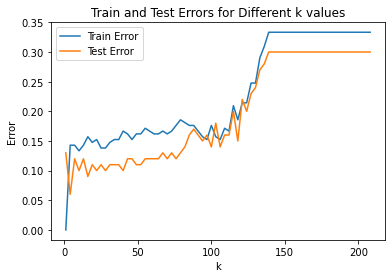

The most suitable k is 4
Confusion Matrix: 
[[21  9]
 [ 0 70]]
True Positive Rate: 1.0
True Negative Rate: 0.7
Precision: 0.8860759493670886
F1-Score: 0.9395973154362416


In [14]:
X_train = train_data.drop('Class', axis=1)
y_train = train_data['Class']
X_test = test_data.drop('Class', axis=1)
y_test = test_data['Class']

train_errors = []
test_errors = []

# Values of k in reverse order
k_values = list(range(208, 0, -3))

# Find errors for different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plotting
plt.figure()
plt.plot(k_values, train_errors, label='Train Error')
plt.plot(k_values, test_errors, label='Test Error')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.title('Train and Test Errors for Different k values')
plt.show()

# Find most suitable k (minimizing test error)
min_test_error_idx = np.argmin(test_errors)
k_star = k_values[min_test_error_idx]
print(f"The most suitable k is {k_star}")

# Evaluate for k = k_star^2 (if it's within our range)
if k_star**2 in k_values:
    knn = KNeighborsClassifier(n_neighbors=k_star**2, metric='euclidean')
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    
    cm = confusion_matrix(y_test, y_test_pred)
    tp = cm[1, 1]
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    
    true_positive_rate = tp / (tp + fn)
    true_negative_rate = tn / (tn + fp)
    precision = precision_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    print(f"Confusion Matrix: \n{cm}")
    print(f"True Positive Rate: {true_positive_rate}")
    print(f"True Negative Rate: {true_negative_rate}")
    print(f"Precision: {precision}")
    print(f"F1-Score: {f1}")

#### iii. Learning Curve

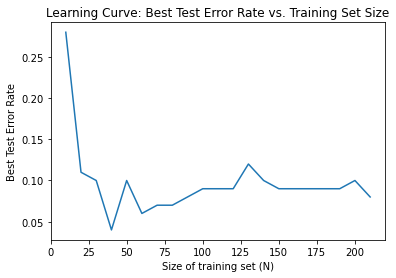

In [15]:
# Assume train_data and test_data are already prepared Pandas DataFrames
X_train = train_data.drop('Class', axis=1)
y_train = train_data['Class']

X_test = test_data.drop('Class', axis=1)
y_test = test_data['Class']

# Split the training set into Class 0 and Class 1
train_data_0 = train_data[train_data['Class'] == 0]
train_data_1 = train_data[train_data['Class'] == 1]

best_error_rates = []

# Loop through different sizes of N
for N in range(10, 211, 10):
    subset_0_count = N // 3
    subset_1_count = N - subset_0_count
    
    # Create the subset of training data
    subset_train_data = pd.concat([train_data_0.iloc[:subset_0_count], train_data_1.iloc[:subset_1_count]])
    subset_train_data = subset_train_data.sample(frac=1).reset_index(drop=True)  # Shuffle the subset
    
    X_train_subset = subset_train_data.drop('Class', axis=1)
    y_train_subset = subset_train_data['Class']
    
    best_error = 1  # Initialize with worst-case error
    best_k = 1
    
    # Loop through different k values (from 1 to N, increasing by 5)
    for k in range(1, N, 5):
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(X_train_subset, y_train_subset)
        
        y_pred = knn_model.predict(X_test)
        error = 1 - accuracy_score(y_test, y_pred)
        
        if error < best_error:
            best_error = error
            best_k = k
            
    best_error_rates.append(best_error)

# Plotting
plt.plot(range(10, 211, 10), best_error_rates)
plt.xlabel("Size of training set (N)")
plt.ylabel("Best Test Error Rate")
plt.title("Learning Curve: Best Test Error Rate vs. Training Set Size")
plt.show()

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [16]:
# Initialize variables
X_train = train_data.drop('Class', axis=1)
y_train = train_data['Class']
X_test = test_data.drop('Class', axis=1)
y_test = test_data['Class']

# Initialize k values and metrics
k_values = list(range(1, 197, 5))
metrics = [
    {'name': 'Minkowski', 'metric': 'minkowski', 'p': 2},
    {'name': 'Manhattan', 'metric': 'manhattan'}
]

# Initialize a dictionary to store test errors for each metric
test_errors_summary = {}

# Loop through each metric
for metric in metrics:
    test_errors = []
    
    for k in k_values:
        # Initialize the k-NN classifier
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric['metric'], p=metric.get('p', 2))
        
        # Fit and predict
        knn.fit(X_train, y_train)
        y_test_pred = knn.predict(X_test)
        
        # Calculate and store the test error
        test_error = 1 - accuracy_score(y_test, y_test_pred)
        test_errors.append(test_error)
    
    # Find the k that minimizes the test error
    min_test_error_idx = np.argmin(test_errors)
    k_star = k_values[min_test_error_idx]
    
    # Store the best test error and k for this metric
    test_errors_summary[metric['name']] = {
        'best_k': k_star,
        'best_test_error': test_errors[min_test_error_idx]
    }

# Display the summary table
print("Metric           Best k    Best Test Error")
print("-----------------------------------------")
for metric, summary in test_errors_summary.items():
    print(f"{metric: <15} {summary['best_k']: <10} {summary['best_test_error']: <15}")

Metric           Best k    Best Test Error
-----------------------------------------
Minkowski       6          0.07999999999999996
Manhattan       6          0.10999999999999999


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [17]:
# Extract the best k (k_star) for Manhattan distance
k_star = test_errors_summary['Manhattan']['best_k']

# Initialize variables for tracking the best log10(p) and its corresponding test error
best_log10p = None
best_test_error = float('inf')

# Loop over log10(p) values
for log10p in np.arange(0.1, 1.1, 0.1):  # [0.1, 0.2, ..., 1.0]
    p = 10 ** log10p
    
    # Train and evaluate KNN model
    knn = KNeighborsClassifier(n_neighbors=k_star, metric='minkowski', p=p)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    print(f"Test error with log10(p) = {log10p}: {test_error}")
    
    # Update best log10(p) if this test_error is lower
    if test_error < best_test_error:
        best_test_error = test_error
        best_log10p = log10p

print(f"The best log10(p) is {best_log10p} with a test error of {best_test_error}")

Test error with log10(p) = 0.1: 0.08999999999999997
Test error with log10(p) = 0.2: 0.08999999999999997
Test error with log10(p) = 0.30000000000000004: 0.07999999999999996
Test error with log10(p) = 0.4: 0.07999999999999996
Test error with log10(p) = 0.5: 0.07999999999999996
Test error with log10(p) = 0.6: 0.06000000000000005
Test error with log10(p) = 0.7000000000000001: 0.06999999999999995
Test error with log10(p) = 0.8: 0.07999999999999996
Test error with log10(p) = 0.9: 0.08999999999999997
Test error with log10(p) = 1.0: 0.08999999999999997
The best log10(p) is 0.6 with a test error of 0.06000000000000005


##### C. Chebyshev Distance With p -> infinity.

In [18]:
# Train and evaluate the KNN model using Chebyshev distance
# Using k_star obtained from previous calculations
knn_chebyshev = KNeighborsClassifier(n_neighbors=test_errors_summary['Manhattan']['best_k'], metric='chebyshev')
knn_chebyshev.fit(X_train, y_train)
y_test_pred = knn_chebyshev.predict(X_test)

# Calculate test error
test_error_chebyshev = 1 - accuracy_score(y_test, y_test_pred)

# Add the result to the summary table
test_errors_summary['Chebyshev'] = {
    'best_k': test_errors_summary['Manhattan']['best_k'],
    'best_test_error': test_error_chebyshev
}

# Display the updated summary table
print("Metric           Best k    Best Test Error")
print("-----------------------------------------")
for metric, summary in test_errors_summary.items():
    print(f"{metric: <15} {summary['best_k']: <10} {summary['best_test_error']: <15}")

Metric           Best k    Best Test Error
-----------------------------------------
Minkowski       6          0.07999999999999996
Manhattan       6          0.10999999999999999
Chebyshev       6          0.09999999999999998


#### ii. Mahalanobis Distance.

In [19]:
# Calculate the inverse of the covariance matrix for Mahalanobis distance
cov_matrix = EmpiricalCovariance().fit(X_train)
inv_cov_matrix = np.linalg.inv(cov_matrix.covariance_)

# Initialize the k-NN classifier with Mahalanobis distance
k_star = test_errors_summary['Manhattan']['best_k']  # Retrieve k_star from previous calculations
knn_mahalanobis = KNeighborsClassifier(n_neighbors=k_star, algorithm='brute', 
                                       metric='mahalanobis', metric_params={'VI': inv_cov_matrix})

# Fit and predict
knn_mahalanobis.fit(X_train, y_train)
y_test_pred = knn_mahalanobis.predict(X_test)

# Calculate test error
test_error_mahalanobis = 1 - accuracy_score(y_test, y_test_pred)

# Add the Mahalanobis results to the summary table
test_errors_summary['Mahalanobis'] = {
    'best_k': k_star,
    'best_test_error': test_error_mahalanobis
}

# Display the updated summary table
print("Metric           Best k    Best Test Error")
print("-----------------------------------------")
for metric, summary in test_errors_summary.items():
    print(f"{metric: <15} {summary['best_k']: <10} {summary['best_test_error']: <15}")

Metric           Best k    Best Test Error
-----------------------------------------
Minkowski       6          0.07999999999999996
Manhattan       6          0.10999999999999999
Chebyshev       6          0.09999999999999998
Mahalanobis     6          0.17000000000000004


### (e) Weighted Decision

In [20]:
# Initialize variables
X_train = train_data.drop('Class', axis=1)
y_train = train_data['Class']
X_test = test_data.drop('Class', axis=1)
y_test = test_data['Class']

# Initialize k values and metrics
k_values = list(range(1, 197, 5))
metrics = [
    {'name': 'Euclidean', 'metric': 'euclidean'},
    {'name': 'Manhattan', 'metric': 'manhattan'},
    {'name': 'Chebyshev', 'metric': 'chebyshev'}
]

# Initialize a dictionary to store test errors for each metric
test_errors_weighted = {}

# Loop through each metric
for metric in metrics:
    test_errors = []
    
    for k in k_values:
        # Initialize the k-NN classifier with weighted voting
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric['metric'], weights='distance')
        
        # Fit and predict
        knn.fit(X_train, y_train)
        y_test_pred = knn.predict(X_test)
        
        # Calculate and store the test error
        test_error = 1 - accuracy_score(y_test, y_test_pred)
        test_errors.append(test_error)
    
    # Find the k that minimizes the test error
    min_test_error_idx = np.argmin(test_errors)
    k_star = k_values[min_test_error_idx]
    
    # Store the best test error and k for this metric
    test_errors_weighted[metric['name']] = {
        'best_k': k_star,
        'best_test_error': test_errors[min_test_error_idx]
    }

# Display the summary table
print("Metric (Weighted) Best k    Best Test Error")
print("-------------------------------------------")
for metric, summary in test_errors_weighted.items():
    print(f"{metric: <18} {summary['best_k']: <10} {summary['best_test_error']: <15}")

Metric (Weighted) Best k    Best Test Error
-------------------------------------------
Euclidean          6          0.09999999999999998
Manhattan          26         0.09999999999999998
Chebyshev          16         0.10999999999999999


### (f) Training Error Rate

A k value of 1 will yield a training error rate of 0 because each data point is its own closest neighbor. However, as 
k increases, the training error rate may also increase because the algorithm starts considering more neighbors, which makes it less likely to perfectly predict the label of each training example.

\[\alpha^2 \]

